In [10]:
import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy import std
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from keras.regularizers import l1
import tensorflow as tf

In [6]:

pip install h5py scikit-optimize

Note: you may need to restart the kernel to use updated packages.


Loading the DataSet

In [21]:
df = pd.read_csv('/Users/alex/Desktop/GIT/MLP_ASSSIGNMENT-1/Reactive_Ion_Plasma/reactive_ion_etching_data.csv')
df.head()

,Run,Pressure,RF Power,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (%),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,1,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,2,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,3,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,4,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,5,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


Data Type Check

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Run                            53 non-null     int64  
 1   Pressure                       53 non-null     int64  
 2   RF Power                       53 non-null     int64  
 3   Electrode Gap                  53 non-null     float64
 4   CCl4 Flow                      53 non-null     int64  
 5   He Flow                        53 non-null     int64  
 6   O2 Flow                        53 non-null     int64  
 7   Etch Rate - Rp (Å/min)         53 non-null     int64  
 8   Etch Uniformity – U (%)        53 non-null     float64
 9   Oxide Selectivity - Sox        53 non-null     float64
 10  Photoresist Selectivity - Sph  53 non-null     float64
dtypes: float64(4), int64(7)
memory usage: 4.7 KB


Deleting the 1st Column

In [23]:
df = df.iloc[:,1:]
df.head()

,Pressure,RF Power,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (%),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


In [25]:
print(df['Photoresist Selectivity - Sph'].unique())

[2.01 1.91 1.85 2.11 2.16 2.28 2.06 1.89 1.32 3.09 1.42 2.09 2.58 2.37
 2.08 1.58 1.99 4.17 2.1  1.76 1.69 1.78 1.72 1.97 2.89 2.98 2.17 1.93
 3.71 2.42 2.31 3.43 2.12 2.99 2.71 2.82 2.05 2.4  2.27 2.07 2.18]


In [26]:
size = df.shape[0]
print('Total size of DataSet: ', size )
na = df.isnull().sum(axis=0)
print ("Null values : ", na)
print ("PERCENTAGE : ", (na/size)*100)

Total size of DataSet:  53
Null values :  Pressure                         0
RF Power                         0
Electrode Gap                    0
CCl4 Flow                        0
He Flow                          0
O2 Flow                          0
Etch Rate - Rp (Å/min)           0
Etch Uniformity – U (%)          0
Oxide Selectivity - Sox          0
Photoresist Selectivity - Sph    0
dtype: int64
PERCENTAGE :  Pressure                         0.0
RF Power                         0.0
Electrode Gap                    0.0
CCl4 Flow                        0.0
He Flow                          0.0
O2 Flow                          0.0
Etch Rate - Rp (Å/min)           0.0
Etch Uniformity – U (%)          0.0
Oxide Selectivity - Sox          0.0
Photoresist Selectivity - Sph    0.0
dtype: float64


In [4]:
print(df.shape)

(53, 10)


In [27]:
df.describe()

,Pressure,RF Power,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (%),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,250.000000,350.000000,1.532075,123.547170,126.415094,15.000000,4204.283019,11.635849,6.988302,2.226981
std,45.641159,45.641159,0.267304,28.660859,59.729980,4.574175,689.441535,10.648241,2.186921,0.541315
min,131.000000,231.000000,1.200000,0.000000,50.000000,3.000000,2704.000000,0.500000,2.650000,1.320000
25%,200.000000,300.000000,1.200000,100.000000,50.000000,10.000000,3684.000000,3.900000,5.840000,1.970000
50%,250.000000,350.000000,1.500000,125.000000,125.000000,15.000000,4390.000000,8.300000,6.410000,2.100000
75%,300.000000,400.000000,1.800000,150.000000,200.000000,20.000000,4703.000000,15.100000,7.720000,2.310000
max,369.000000,469.000000,2.200000,184.000000,200.000000,27.000000,5515.000000,55.200000,15.150000,4.170000


In [28]:
df.head()

,Pressure,RF Power,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (%),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


<Axes: >

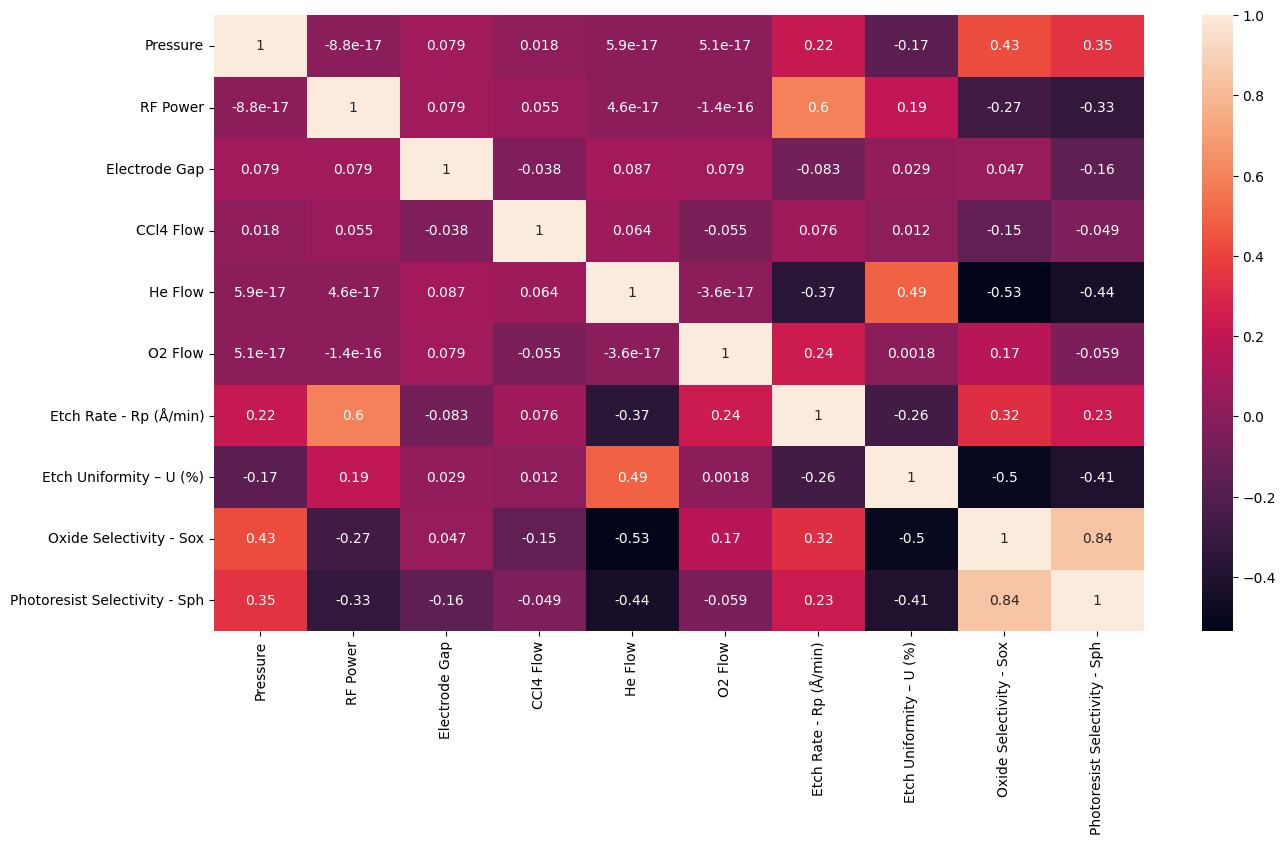

In [30]:
graph = (15, 8)
fig, ax = plt.subplots(figsize=graph)
corr = df.corr()
sns.heatmap(corr, annot = True)

In [41]:
X_train_df = df.iloc[:,0:6]
y_train_df = df.iloc[:,6:]
X_test_df = df.iloc[:,0:6]
y_test_df = df.iloc[:,6:]

<Axes: >

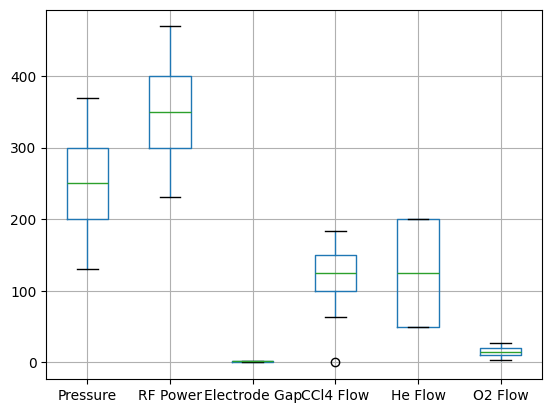

In [45]:
X_train_df.boxplot()

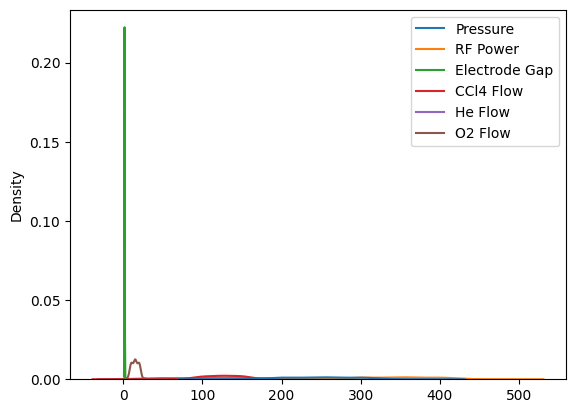

In [39]:
sns.kdeplot(X_train_df)
plt.show()

Data Normalization

In [43]:
Normalized_X_train_df = (X_train_df - X_train_df.mean())/X_train_df.std()

Normalized_X_test_df = (X_test_df - X_test_df.mean())/X_test_df.std()

<Axes: >

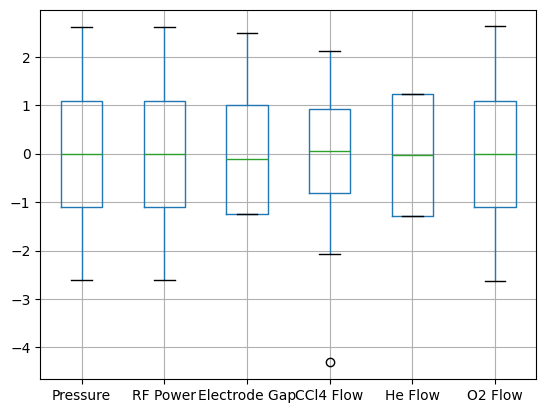

In [44]:
Normalized_X_train_df.boxplot()

[Text(0.5, 0, 'Indepedent variables')]

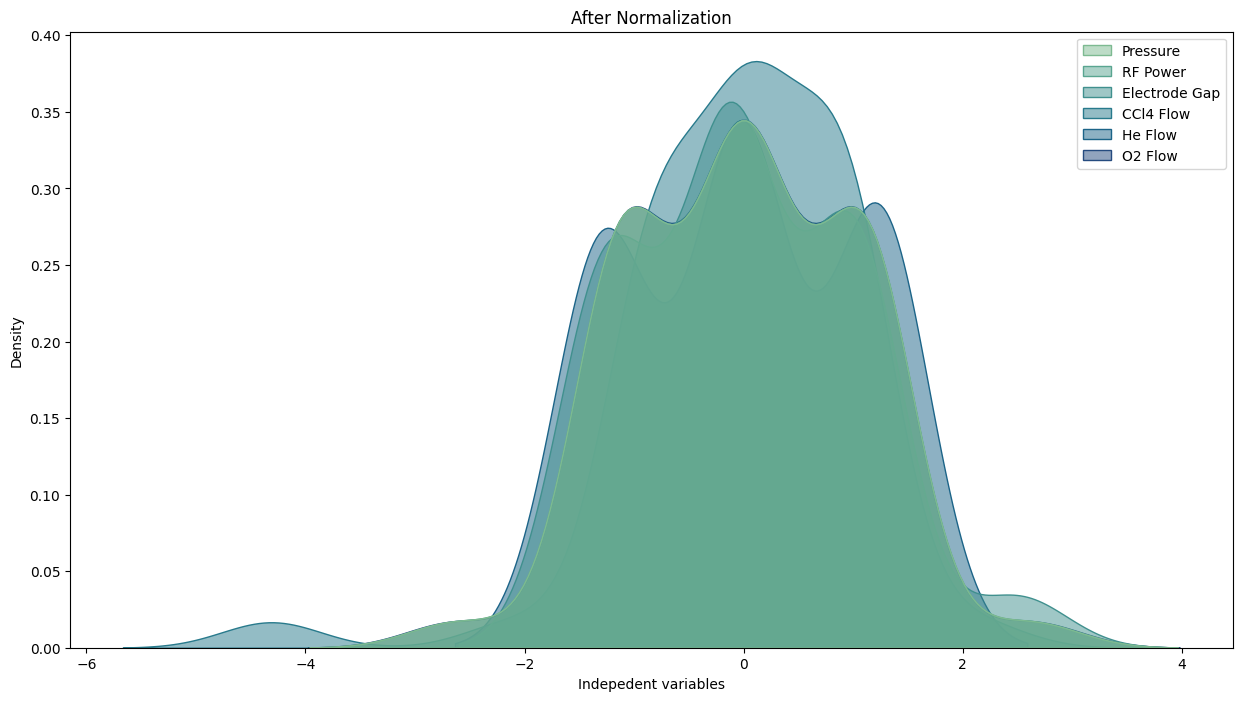

In [47]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)

# plot of 2 variables
sns.kdeplot(data=Normalized_X_train_df,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=1).set_title("After Normalization")
ax.set(xlabel='Indepedent variables')
